Auteur : Doudou DIEME

In [315]:
#Importation des packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
import numpy as np
import imp

In [316]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import matplotlib.colors as colors
import matplotlib.cm as cmx
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV

from scipy.stats import uniform
from scipy.stats import norm
import encodings

In [317]:
# always reload modules so that as you change code in wine_ddieme, it gets loaded
%load_ext autoreload

import numpy as np

# pour rendre les outputs de ce notebook identiques à chaque exécution
np.random.seed(28)

# ignorer les FuturWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Chargement des deux bases

In [20]:
# importation du dataset winequality_red

df_red = pd.read_csv('C:/Users/hp/Desktop/projet/wine_ddieme/dataset/winequality_red.csv', sep=';')
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [25]:
df_red.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


#### Statistique descriptive

In [22]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Ce tableau ci-dessus nous montre qu'il n'y a pas de valeur manquante.la ligne str reprèsente l'ecart entre les differentes valeur et par contre les 25%,50% et 75% representent les quantiles qui divisent notre jeu de donnée en intervalles.

In [19]:
df_white = pd.read_csv('C:/Users/hp/Desktop/projet/wine_ddieme/dataset/winequality_white.csv', sep=';')
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [24]:
df_white.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Statistique decriptive

In [26]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Ce tableau ci-dessus nous montre qu'il n'y a pas de valeur manquante.la ligne str reprèsente l'ecart entre les differentes valeur et par contre les 25%,50% et 75% representent les quantiles qui divisent notre jeu de donnée en intervalles.

Ajout d'une colonne suplémentaire (color) en différencient les couleurs des deux vins etconcatenation des deux bases de données

In [27]:
df_white['color'] = "W"

df_red['color'] = "R"
df = pd.concat([df_red, df_white])
df.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R


comptons le nombre total de vins rouge (R) et blanc (W) séparament

In [28]:
df["color"].value_counts() 

W    4898
R    1599
Name: color, dtype: int64

In [29]:
#asignon vins = df
vins=df

## Statistique descriptive de la base concatané

In [30]:
print(vins.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

Celle-ci nous montre la statistique descriptive de chacun des variables c'est à dire les ecart types,moyennes,minimum,maximum et les differentes quantiles de tous les variables numeriques.

Determinons le nombre de vins rouge et blanc dans notre nouvelle base.Et ceci nous montre qu'on a 4898 de donnée de vin blanc et 1599 de données de vin rouge visualisé ci-dessous.

In [31]:
X = vins.drop(['quality','color'],axis=1)
Y = vins['quality']


vins["color"].value_counts()

W    4898
R    1599
Name: color, dtype: int64

In [160]:
print(len(vins[vins.color == 'W']), "vins Blanc")

4898 vins Blanc


In [159]:
print(len(vins[vins.color == 'R']), "vins Rouge")

1599 vins Rouge


Comme nous avons beaucoup de vins du très bon aux très mauvais, nous allons vérifier si les notes sont distribuées de façon non uniforme.

Distribution des vins

NameError: name 'vins' is not defined

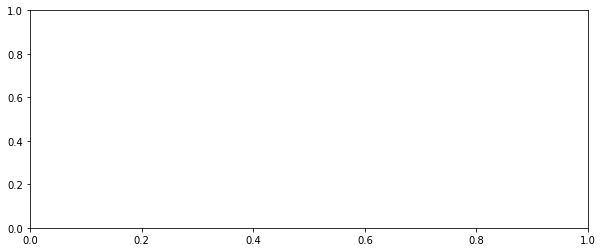

In [3]:
import matplotlib.pyplot as plt
plt.close('all')
#plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
vins.quality.hist(bins=18, ax=ax)
plt.title('Distribution of wines according to quality')
plt.show()

In [149]:
vins["quality"].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

Les vins avec une note de 3 et 9 sont peu représentés avec seulement 5-10 echantillions, ce qui risque de poser un peu de problème de sur apprentissage

Selon notre ensemble de données, la valeur de qualité doit être comprise entre 0 et 10. Dans l'ensemble de données (basé sur l'histogramme et le résumé numérique), la valeur de qualité minimale est 3 et la valeur maximale est 9. La majorité des vins (plus de 1 200) ont un classement de 5 ou 6 pour leur qualité. Environ 1à00 vins ont un classement de qualité 7, mais le nombre n'est pas aussi significatif que 5 et 6. Le reste est soit 3, 4 , 8 ou 9. La qualité moyenne (moyenne) des vins dans la base de données est de 5,818378 et la médiane est de 6 .

Nous examinons les caractéristiques des variables et surtout les relations entre ces variables. Pour cela on utilise une méthode d”analyse factorielle pour mettre en évidence des relations entre les variables quantitatives (mesures physico-chimique) et la variable quantitative illustrative “quality”.

Nous allons lancer une analyse en composante principale (ACP) pour représenter un ensemble de points dans un espace de dimension.

## Analyse en composante principale ACP

In [36]:
pca = PCA(n_components=5)
Xn = normalize(X)
pca.fit(Xn)

PCA(n_components=5)

In [37]:
PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=5)

## valeur propre de l'ACP apres normalisation

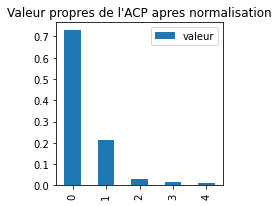

In [38]:
eig = pd.DataFrame(dict(valeur=pca.explained_variance_ratio_))
ax = eig.plot(kind='bar', figsize=(3,3))
ax.set_title("Valeur propres de l'ACP apres normalisation");
plt.show()

Nous avons les 2 premiers axes qui regroupent plus de 90% des informations. Regardons les coordonnées du premier v1 et deuxième v2 axe.

In [39]:
v2 = pd.DataFrame(pca.components_[0:2,:]).T
v2.index = vins.columns[:-2]
v2.columns = ['v1', 'v2']

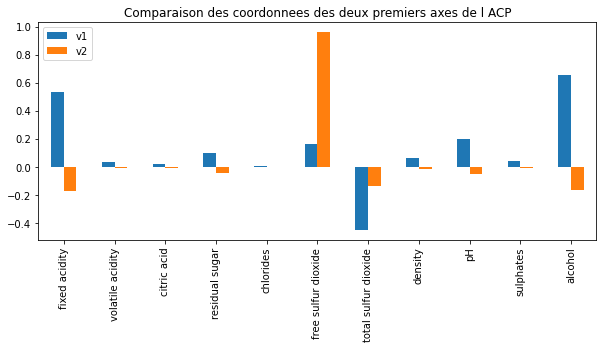

In [40]:
ax = v2.plot(y=['v1', 'v2'], kind='bar', figsize=(10,4))
ax.legend(loc='upper left')
ax.set_title("Comparaison des coordonnees des deux premiers axes de l ACP")


plt.show()

On remarque que l’alcool, l’acidité, le dioxyde, le pH semble jouer un rôle plus grand que les autres variables

In [150]:
proj = pca.transform(Xn)

pl = pd.DataFrame(proj[:, :3])
pl.columns = ['v1', 'v2', 'v3']

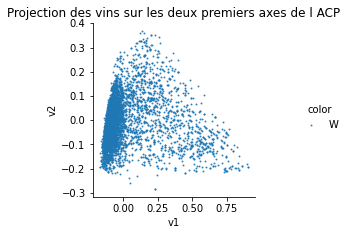

In [258]:
pl['quality'] = df_white['quality']
pl['color'] = df_white['color']
#Premier graphe selon les couleurs.
ax = sns.lmplot(x="v1", y="v2", hue="color",truncate=True, data=pl, scatter_kws={"s": 1}, fit_reg=False, size=3)
ax.ax.set_title("Projection des vins sur les deux premiers axes de l ACP");

plt.show()

Avec l’ACP on remarque avec le grahe que les vins blancs et rouges pourraient être différents chimiquement et qu’il y a une frontière entre les vins. Il est donc possible de prédire la couleur en fonction des données disponibles dans ce jeu de données via une classification. Cependant ce n’est pas l’objectif de se projet.

On représente maintenant les notes des vins.

## Représentations des notes des vins.

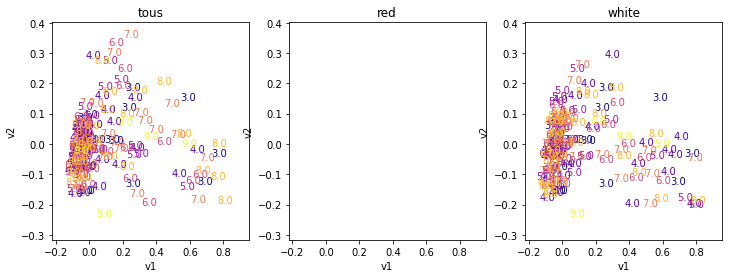

In [318]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))
red = pl[pl.color == 'R']
white = pl[pl.color == 'W']

# Choisir un dégragé ici
cmap = plt.get_cmap('plasma')
cnorm = colors.Normalize(vmin=pl['quality'].min(), vmax=pl['quality'].max())
scalar = cmx.ScalarMappable(norm=cnorm, cmap=cmap)

for i, data, title in [(0, pl, 'tous'), (1, red, 'red'), (2, white, 'white')]:
    ax = axs[i]
    # On trace les points pour que le texte n'apparaissent pas en dehors des zones
    pl.plot(x='v1', y='v2', kind='scatter', color="white", ax=ax)

    for note in sorted(set(data['quality'])):
        sub = data[data.quality == note]
        if sub.shape[0] > 100:
            sub = sub.sample(n=30)

        color = scalar.to_rgba(note)
        for i, row in enumerate(sub.itertuples()):
            ax.text(row[1], row[2], str(row[4]), color=color)
    ax.set_title(title);
    
    
plt.show()  

Les vins rouges et blancs apparaissent comme très différents, cela vaudra sans doute le coup de faire deux modèles si la performance n’est pas assez bonne. Les bonnes notes ne se détache pas particulièrement sur ces graphes. Le problème est peut-être simple mais ce ne sont pas ces graphes qui vont nous le dire.

Maintenant on va choisir quel algorithme est le plus précis pour prédire la note d’un vin. Nous allons tester 6 algorithmes pour avoir la meilleure prédiction possible.

1.Random Forests

2.Logistic Regression

3.Stochastic Gradient Decent Classifier

4.Decision Trees

5.SVM

6.Plus proche voisins knn

Voici les algorithmes que nous allons tester avec des hyperparametres par défaut.

## Les modèles d’algorithmes
#### Découpage des jeux de données training et Testing

In [200]:
# Maintenant, séparons le jeu de données en tant que variable de réponse et variabes d'entitéss
X = vins.drop(['quality','color'], axis = 1)
y = vins['quality']

#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Applying Standard scaling to get optimized result
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Nous allons d’abord diviser les données en deux. 80% de des données iront dans la partie training pour entrainer le modèle et les 20% restants des données iront dans la partie test pour la validation du modèle.

In [260]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [205]:
pred_rfc = rfc.predict(X_test)

#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.71      0.12      0.20        43
           5       0.67      0.71      0.69       402
           6       0.65      0.75      0.70       597
           7       0.71      0.53      0.61       215
           8       1.00      0.33      0.50        36
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.53      0.35      0.39      1300
weighted avg       0.67      0.67      0.65      1300



In [93]:
print ("Overall Accuracy:", round(metrics.accuracy_score(y_test, pred_rfc), 3))

Overall Accuracy: 0.665


In [94]:
rfc_defaut=round(metrics.accuracy_score(y_test, pred_rfc), 3)

In [206]:
print(rfc_defaut)

0.665


2.Logistic Regression

In [95]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [208]:
pred_lr = lr.predict(X_test)
#Let's see how our model performed
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00        43
           5       0.53      0.60      0.56       402
           6       0.54      0.69      0.60       597
           7       0.52      0.20      0.29       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1300
   macro avg       0.37      0.24      0.25      1300
weighted avg       0.50      0.53      0.50      1300



In [97]:
print ("Overall Accuracy:", round(metrics.accuracy_score(y_test, pred_lr), 3))

Overall Accuracy: 0.534


3.Stochastic Gradient Decent Classifier

In [98]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)

SGDClassifier(penalty=None)

In [99]:
pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.20      0.02      0.04        43
           5       0.50      0.66      0.57       402
           6       0.51      0.60      0.55       597
           7       0.30      0.08      0.12       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.50      1300
   macro avg       0.22      0.20      0.18      1300
weighted avg       0.45      0.50      0.45      1300



In [100]:
print ("Overall Accuracy:", round(metrics.accuracy_score(y_test, pred_sgd), 3))

Overall Accuracy: 0.496


4.Decision Trees

In [101]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [102]:
pred_dt = dt.predict(X_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.18      0.21      0.19        43
           5       0.55      0.60      0.58       402
           6       0.60      0.55      0.58       597
           7       0.46      0.50      0.48       215
           8       0.29      0.25      0.27        36
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1300
   macro avg       0.30      0.30      0.30      1300
weighted avg       0.54      0.53      0.54      1300



In [103]:
print ("Overall Accuracy:", round(metrics.accuracy_score(y_test, pred_dt), 3))

Overall Accuracy: 0.535


5.SVM

In [104]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [105]:
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.58      0.65      0.61       402
           6       0.55      0.72      0.62       597
           7       0.61      0.19      0.29       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.25      0.22      0.22      1300
weighted avg       0.53      0.56      0.52      1300



In [106]:
print ("Overall Accuracy:", round(metrics.accuracy_score(y_test, pred_svc), 3))


Overall Accuracy: 0.562


In [107]:
svc_defaut=round(metrics.accuracy_score(y_test, pred_svc), 3)

6.Plus proche voisins knn

In [108]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [109]:
pred_knn = svc.predict(X_test)

In [110]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.58      0.65      0.61       402
           6       0.55      0.72      0.62       597
           7       0.61      0.19      0.29       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.25      0.22      0.22      1300
weighted avg       0.53      0.56      0.52      1300



In [111]:
print ("Overall Accuracy:", round(metrics.accuracy_score(y_test, pred_knn), 3))

Overall Accuracy: 0.562


Nous avons trouver que l’algorithme le plus précis est les forets aléatoire avec 0.67% de précision. Puis nous avons les algorithmes arbre de décision, SVM et les plus proche voisins avec 0.56% de precision pour prédire les notes. Nous allons selectionner et valider les hyperparametres.

## Selection/validation des hyperparameters

# Hyperparameters pour les Forets aléatoires

In [209]:
# Designate distributions to sample hyperparameters from
n_estimators = np.random.uniform(70, 80, 5).astype(int)
max_features = np.random.normal(6, 3, 5).astype(int)

# Check max_features>0 & max_features<=total number of features
max_features[max_features <= 0] = 1
max_features[max_features > X.shape[1]] = X.shape[1]

hyperparameters = {'n_estimators': list(n_estimators),
                   'max_features': list(max_features)}

print (hyperparameters)

{'n_estimators': [78, 79, 73, 77, 76], 'max_features': [7, 11, 6, 11, 4]}


On va sélectionner ces hyperparametres pour l’optimisation de l’algorithme avec RandomizedSearchCV qui est plus rapide en execution que GridSearchCV.

In [221]:
# Run randomized search
randomCV = RandomizedSearchCV(RandomForestClassifier(), param_distributions=hyperparameters, n_iter=20)
randomCV.fit(X_train, y_train)

# Identify optimal hyperparameter values

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_features': [7, 11, 6, 11, 4],
                                        'n_estimators': [78, 79, 73, 77, 76]})

In [222]:
best_n_estim      = randomCV.best_params_['n_estimators']
best_max_features = randomCV.best_params_['max_features']

print("The best performing n_estimators value is: {:5d}".format(best_n_estim))

The best performing n_estimators value is:    78


In [223]:
print("The best performing max_features value is: {:5d}".format(best_max_features))

The best performing max_features value is:     4


On a trouvé les meilleurs hyperparametres donc on va pouvoir lancer l’apprentissage puis on va faire des tests sur les données.

### Apprentissage optimal avec les nouveaux hyperparametres

L’algorithme RandomForestClassifier

In [224]:
# Train classifier using optimal hyperparameter values
# We could have also gotten this model out from randomCV.best_estimator_
rfc2 = RandomForestClassifier(n_estimators=best_n_estim,
                            max_features=best_max_features)

rfc2.fit(X_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=78)

In [225]:
rfc2_predictions = rfc2.predict(X_test)

In [226]:
print (metrics.classification_report(y_test, rfc2_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.67      0.05      0.09        43
           5       0.66      0.69      0.67       402
           6       0.65      0.76      0.70       597
           7       0.69      0.52      0.59       215
           8       0.86      0.33      0.48        36
           9       0.00      0.00      0.00         1

    accuracy                           0.66      1300
   macro avg       0.50      0.34      0.36      1300
weighted avg       0.66      0.66      0.64      1300



In [227]:
print ("Overall Accuracy optimal:", round(metrics.accuracy_score(y_test, rfc2_predictions), 3))

Overall Accuracy optimal: 0.658


In [228]:
print("Overall Accuracy par defaut :",rfc_defaut)

Overall Accuracy par defaut : 0.665


On voit qu’il y a eu une amélioration de la précison avec les nouveau hyperparametres. Cependant nous avons encore une trop grande imprécison pour noter les vins surtout à cause des vins noté 9 ou nous avons que 5 echantillions sur les 6400 vins.

In [229]:
#converting the numpy array to list
xRF=np.array(rfc2_predictions).tolist()

#printing first 5 predictions
print("\nLa prediction pour random Forest:\n")


La prediction pour random Forest:



In [230]:
for i in range(0,5):
  print (xRF[i])

6
5
7
6
5


In [231]:
#printing first five expectations
print("\nLes observations pour random Forest:\n")


Les observations pour random Forest:



In [232]:
print (y_test.head())

1504    8
1419    5
3162    7
3091    6
2433    6
Name: quality, dtype: int64


On remarque que les notes prédites ne sont pas très fiables.

Maintenant, on va faire un test sur l’algorithme SVM afin de voir si on peut améliorer la précision de la prédiction.

In [234]:
# Designate distributions to sample hyperparameters from
np.random.seed(123)
g_range = np.random.uniform(0.0, 0.3, 5).astype(float)
C_range = np.random.normal(1, 0.1, 5).astype(float)

# Check that gamma>0 and C>0
C_range[C_range < 0] = 0.0001

hyperparameters = {'gamma': list(g_range),
                    'C': list(C_range)}

print (hyperparameters)

{'gamma': [0.2089407556793585, 0.08584180048511383, 0.06805543606926093, 0.16539443072486737, 0.2158406909356689], 'C': [1.0322106068339623, 0.9948482279060615, 0.9795799035361106, 1.197934843277785, 0.8380699934963254]}


## RandomizedSearchCV using cross-validation pour SVM

On prendra l’algorithme SVM avec un noyau non linéaire pour cette prédiction et de type radial basis function car il est très populaire.

In [235]:
# Run randomized search
randomCV = RandomizedSearchCV(SVC(kernel='rbf', ), param_distributions=hyperparameters, n_iter=20)
randomCV.fit(X_train, y_train)

# Identify optimal hyperparameter values

RandomizedSearchCV(estimator=SVC(), n_iter=20,
                   param_distributions={'C': [1.0322106068339623,
                                              0.9948482279060615,
                                              0.9795799035361106,
                                              1.197934843277785,
                                              0.8380699934963254],
                                        'gamma': [0.2089407556793585,
                                                  0.08584180048511383,
                                                  0.06805543606926093,
                                                  0.16539443072486737,
                                                  0.2158406909356689]})

In [236]:
best_gamma  = randomCV.best_params_['gamma']
best_C      = randomCV.best_params_['C']

In [237]:
print("The best performing gamma value is: {:5.2f}".format(best_gamma))

The best performing gamma value is:  0.17


In [238]:
print("The best performing C value is: {:5.2f}".format(best_C))

The best performing C value is:  1.20


## Apprentissage optimal avec les nouveaux hyperparametres

L’algorithme SVM

In [239]:
# Train SVM and output predictions
rbfSVM = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
rbfSVM.fit(X_train, y_train)

SVC(C=1.197934843277785, gamma=0.16539443072486737)

In [240]:
svm_predictions = rbfSVM.predict(X_test)

In [241]:
print(metrics.classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.50      0.02      0.04        43
           5       0.58      0.66      0.62       402
           6       0.56      0.70      0.62       597
           7       0.58      0.22      0.32       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.57      1300
   macro avg       0.32      0.23      0.23      1300
weighted avg       0.55      0.57      0.53      1300



In [242]:
print("Overall Accuracy optimise:", round(metrics.accuracy_score(y_test, svm_predictions),1))

Overall Accuracy optimise: 0.6


In [243]:
print(" Overall Accuracy par defaut: ",svc_defaut)

 Overall Accuracy par defaut:  0.562


On remarque que la précision à augmenter mais pas suffisament par rapport à l’algorithme forets aléatoires.

On vérifie avec quelques notes de vins pour l’algorithme SVM

In [244]:
#converting the numpy array to list
x=np.array(svm_predictions).tolist()

#printing first 5 predictions
print("\nThe prediction SVM:\n")


The prediction SVM:



In [245]:
for i in range(0,5):
    print (x[i])

6
5
7
5
5


In [246]:
#printing first five expectations
print("\nThe expectation SVM:\n")


The expectation SVM:



In [247]:
print(y_test.head())

1504    8
1419    5
3162    7
3091    6
2433    6
Name: quality, dtype: int64


Pour 5 exemples, nous avons seulement 2 notes correctes Cependant avec plus d’exemples de vins notés on arrive à 57% pour l’algorithme SVM.

## Entrainons notre model 

In [328]:
from sklearn.model_selection import train_test_split
strata = vins.color
X_train, y_test = train_test_split(vins, test_size=0.2, random_state=28, stratify=strata)

In [329]:
X_train['color'].value_counts(normalize=True) * 100

W    75.389648
R    24.610352
Name: color, dtype: float64

Nous pouvons constater que les echantillons bs_all_train et bs_all_test sont bien stratifies: 75% des données represente les vins blanc et 25% des données representent les vins rouges.

In [332]:
y_test['color'].value_counts(normalize=True) * 100

W    75.384615
R    24.615385
Name: color, dtype: float64

In [337]:
TRAIN_PATH = os.path.join("C:/Users/hp/Desktop/projet/wine_ddieme/dataset/interime/X_train.csv")
TEST_PATH = os.path.join("C:/Users/hp/Desktop/projet/wine_ddieme/dataset/interime/y_test.csv")
helpers1.save_csv(X_train, TRAIN_PATH)
helpers1.save_csv(y_test, TEST_PATH)

In [379]:
y_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
85,7.1,0.44,0.62,11.8,0.044,52.0,152.0,0.99750,3.12,0.46,8.7,6,W
1154,7.9,0.16,0.30,4.8,0.037,37.0,171.0,0.99670,3.47,0.44,9.0,4,W
2961,6.9,0.23,0.41,8.0,0.030,30.0,114.0,0.99368,3.22,0.54,11.0,6,W
3385,6.4,0.32,0.31,1.9,0.037,34.0,126.0,0.99000,3.06,0.45,11.8,6,W
2124,7.7,0.39,0.28,4.9,0.035,36.0,109.0,0.99180,3.19,0.58,12.2,7,W


Eliminons les deux variables 'quality' et 'color'

In [380]:
X = data.drop(['quality', 'color'], axis=1)
y = data['color']

In [381]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Creation du Model avec la regresion logistique

In [382]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [383]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()
clr.fit(X_train, y_train)

LogisticRegression()

In [384]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, clr.predict(X_test))
conf

array([[ 380,   19],
       [  12, 1214]], dtype=int64)

In [385]:
import pandas
cf = pandas.DataFrame(conf, columns=['prédit ' + _ for _ in clr.classes_])
cf.index = ['vrai ' + _ for _ in clr.classes_]
cf

,prédit red,prédit white
vrai red,380,19
vrai white,12,1214


Un classifieur construit une frontière entre deux classes, la distance d’un point à la frontière constitue une information importante. Plus elle est grande, plus le modèle est confiant. Cette distance est souvent appelée score.

In [386]:
clr.decision_function(X_test)

array([ 1.99787196, -0.65975847,  5.45154028, ...,  7.13590459,
        6.8246059 , -6.86250191])

Mais on préfère les probabilités quand elles sont disponibles :

In [387]:
clr.predict_proba(X_test)

array([[1.19426533e-01, 8.80573467e-01],
       [6.59206131e-01, 3.40793869e-01],
       [4.27136940e-03, 9.95728631e-01],
       ...,
       [7.95372276e-04, 9.99204628e-01],
       [1.08552449e-03, 9.98914476e-01],
       [9.98954801e-01, 1.04519934e-03]])

In [388]:
score = clr.decision_function(X_test)
dfsc = pandas.DataFrame(score, columns=['score'])
dfsc['color'] = y_test
dfsc.head()

,score,color
0,1.997872,NaN
1,-0.659758,NaN
2,5.451540,NaN
3,10.467241,NaN
4,0.709169,NaN


Voyons comment le score est distribué :

In [389]:
dfsc = pandas.DataFrame(score, columns=['score'])
dfsc['color'] = y_test.values
dfsc.head(9)

,score,color
0,1.997872,white
1,-0.659758,red
2,5.451540,white
3,10.467241,white
4,0.709169,red
5,7.814585,white
6,0.940259,white
7,-5.074807,red
8,5.434599,white


Par rapport au score, nous constatons que la coouleur du vin diffère.

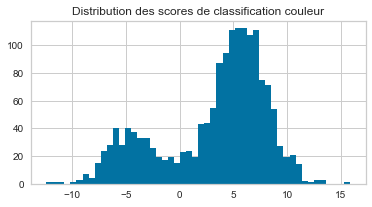

In [390]:
ax = dfsc['score'].hist(bins=50, figsize=(6,3))
ax.set_title('Distribution des scores de classification couleur');

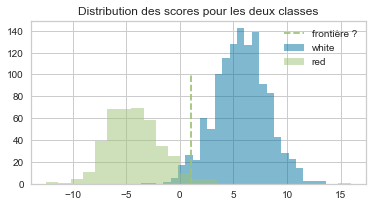

In [391]:
ax = dfsc[dfsc['color'] == 'white']['score'].hist(bins=25, figsize=(6,3), label='white', alpha=0.5)
dfsc[dfsc['color'] == 'red']['score'].hist(bins=25, ax=ax, label='red', alpha=0.5)
ax.set_title("Distribution des scores pour les deux classes")
ax.plot([1, 1], [0, 100], 'g--', label="frontière ?")
ax.legend();

Il y a quelques confusions autour de 0 mais le modèle est pertinent au sens où la frontière entre les deux classes est assez nette : les deux cloches ne se superposent pas. Voyons avec les probabilités :

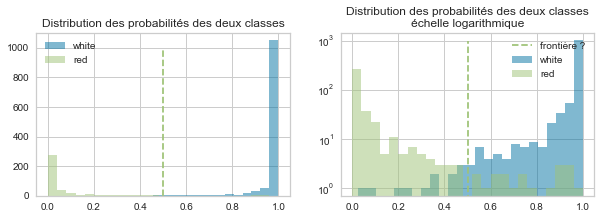

In [392]:
proba = clr.predict_proba(X_test)[:, 1]
dfpr = pandas.DataFrame(proba, columns=['proba'])
dfpr['color'] = y_test.values

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10,3))
dfpr[dfpr['color'] == 'white']['proba'].hist(bins=25, label='white', alpha=0.5, ax=ax[0])
dfpr[dfpr['color'] == 'red']['proba'].hist(bins=25, label='red', alpha=0.5, ax=ax[0])
ax[0].set_title('Distribution des probabilités des deux classes')
ax[0].legend();
dfpr[dfpr['color'] == 'white']['proba'].hist(bins=25, label='white', alpha=0.5, ax=ax[1])
dfpr[dfpr['color'] == 'red']['proba'].hist(bins=25, label='red', alpha=0.5, ax=ax[1])
ax[0].plot([0.5, 0.5], [0, 1000], 'g--', label="frontière ?")
ax[1].plot([0.5, 0.5], [0, 1000], 'g--', label="frontière ?")
ax[1].set_yscale('log')
ax[1].set_title('Distribution des probabilités des deux classes\néchelle logarithmique')
ax[1].legend();

Il y a quelques confusions autour de 0 mais le modèle est pertinent au sens où la frontière entre les deux classes est assez nette : les deux cloches ne se superposent pas

## Conclusion

Le meilleur algorithme pour prédire la note d’un vin pour ce jeu de données est l’algorithme Forets aléatoires. L’optimisation des hyperparametres a permis d’améliorer la precision mais pas de beaucoup. Ce projet a été très interéssant à réaliser car j’ai appliqué les méthodes vue en cours et j’ai aussi utilisé des nouvelles bibliothèques comme Pandas. J’ai aussi fait une  analyse en composante principale. Il serait aussi intéressant de faire une classification multi classe pour prédire la couleur du vin.